   ID bug type         species  Min Red_x  Min Green_x  Min Blue_x  Max Red_x  \
0   1      Bee  Apis mellifera        5.0          3.0         0.0      208.0   
1   2      Bee  Apis mellifera        2.0          2.0         0.0      248.0   
2   3      Bee  Apis mellifera        3.0          0.0         0.0      255.0   
3   4      Bee  Apis mellifera        5.0          3.0         0.0      219.0   
4   5      Bee  Apis mellifera        6.0          0.0         0.0      255.0   

   Max Green_x  Max Blue_x  Mean Red_x  ...  Median Green_y  Median Blue_y  \
0        199.0       193.0   68.085745  ...            37.0           24.0   
1        251.0       244.0   63.786498  ...            34.0           19.0   
2        255.0       255.0  107.176333  ...            86.0           52.0   
3        213.0       201.0   87.588243  ...            61.0           36.0   
4        250.0       245.0  123.177003  ...            91.0           63.0   

   Std Dev Red_y  Std Dev Green_y  Std Dev B

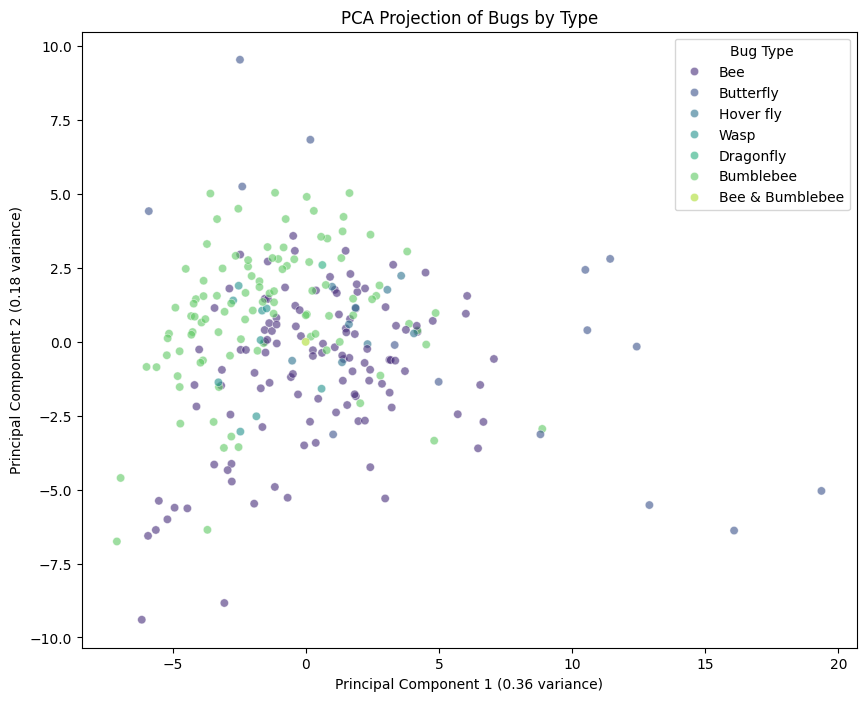

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Charger les données depuis le fichier Excel
file_path = '../train/classif_test.xlsx'
data = pd.read_excel(file_path)

# Afficher un aperçu des données
print(data.head())
print(data.dtypes)

# Séparer les caractéristiques et les étiquettes
features = data.drop(columns=['ID', 'bug type', 'species'])
labels = data['bug type']

# Imputer les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardiser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Appliquer la PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Créer un DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Bug Type'] = labels

# Afficher la variance expliquée
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par les premières 2 composantes: {explained_variance.cumsum()}")

# Graphique PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Bug Type', data=pca_df, palette='viridis', alpha=0.6)
plt.title('PCA Projection of Bugs by Type')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f} variance)')
plt.legend(title='Bug Type')
plt.show()